# pBAD induction control

Expressing free Halo tag from a pBAD plasmid, in the same conditions as the Gam experiments.

In [1]:
from pyberries.data import DatasetPool

data = DatasetPool(path='/media/daniel/HDD Daniel/DanielThedie/BACMMAN/Timelapse',
                   dsList=['240312_1', '240312_2', '240312_3', '240312_4', '240312_5', '240312_6'],
                   groups=['ara 1%', 'ara 1%', 'ara 1%', 'no ara', 'no ara', 'no ara']
                   )

Dataset 240312_1: loaded objects ['Bacteria_large', 'Halo']
Dataset 240312_2: loaded objects ['Bacteria_large', 'Halo']
Dataset 240312_3: loaded objects ['Bacteria_large', 'Halo']
Dataset 240312_4: loaded objects ['Bacteria_large', 'Halo']
Dataset 240312_5: loaded objects ['Bacteria_large', 'Halo']
Dataset 240312_6: loaded objects ['Bacteria_large', 'Halo']


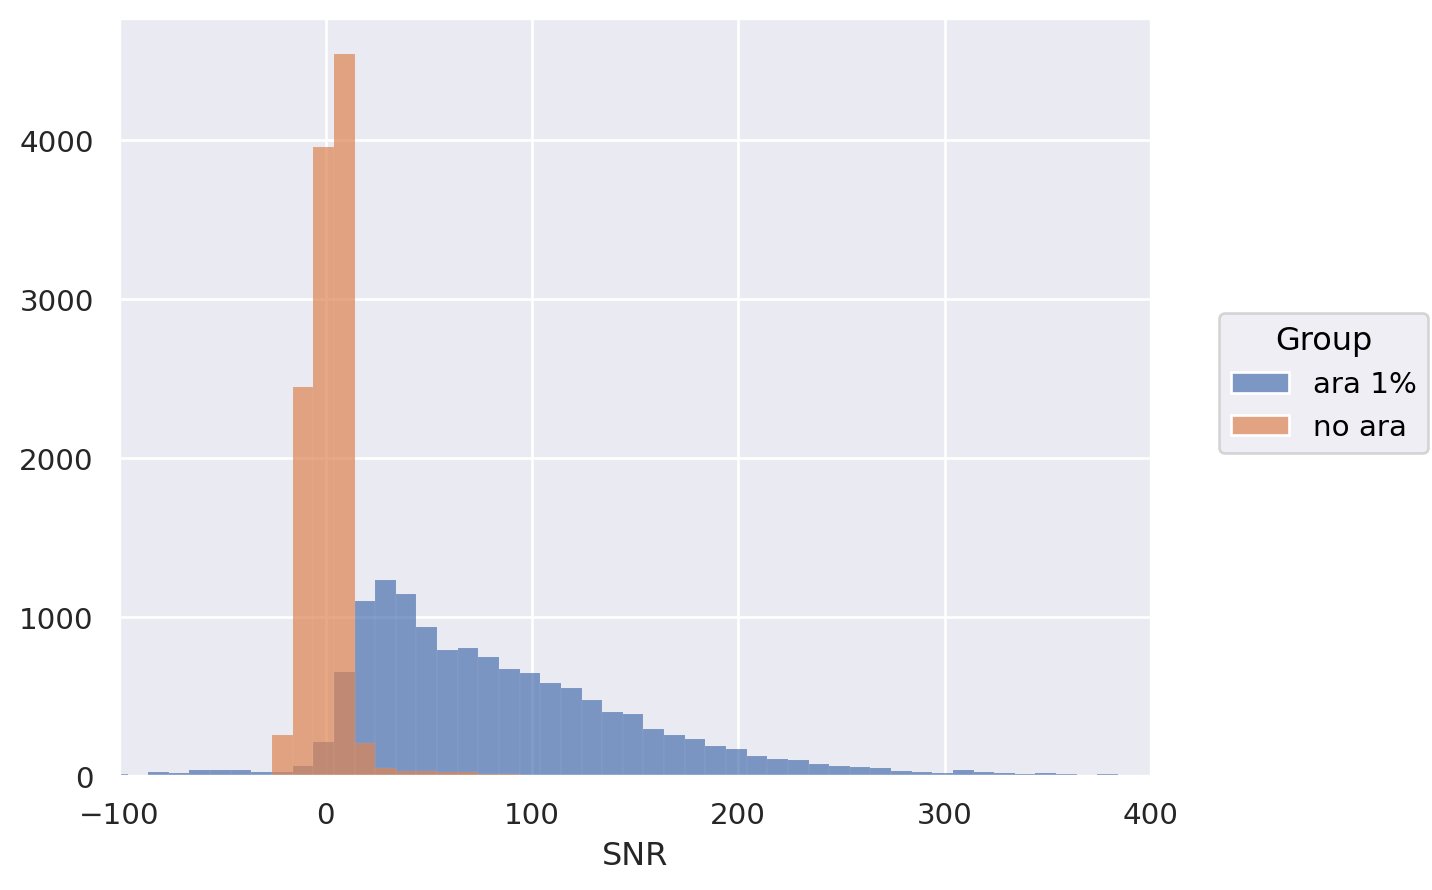

In [14]:
import seaborn.objects as so

(
    so.Plot(data.Bacteria_large, x='SNR', color='Group')
    .add(so.Bars(), so.Hist(binwidth=10, common_norm=False))
    .limit(x=(-100, 400))
)

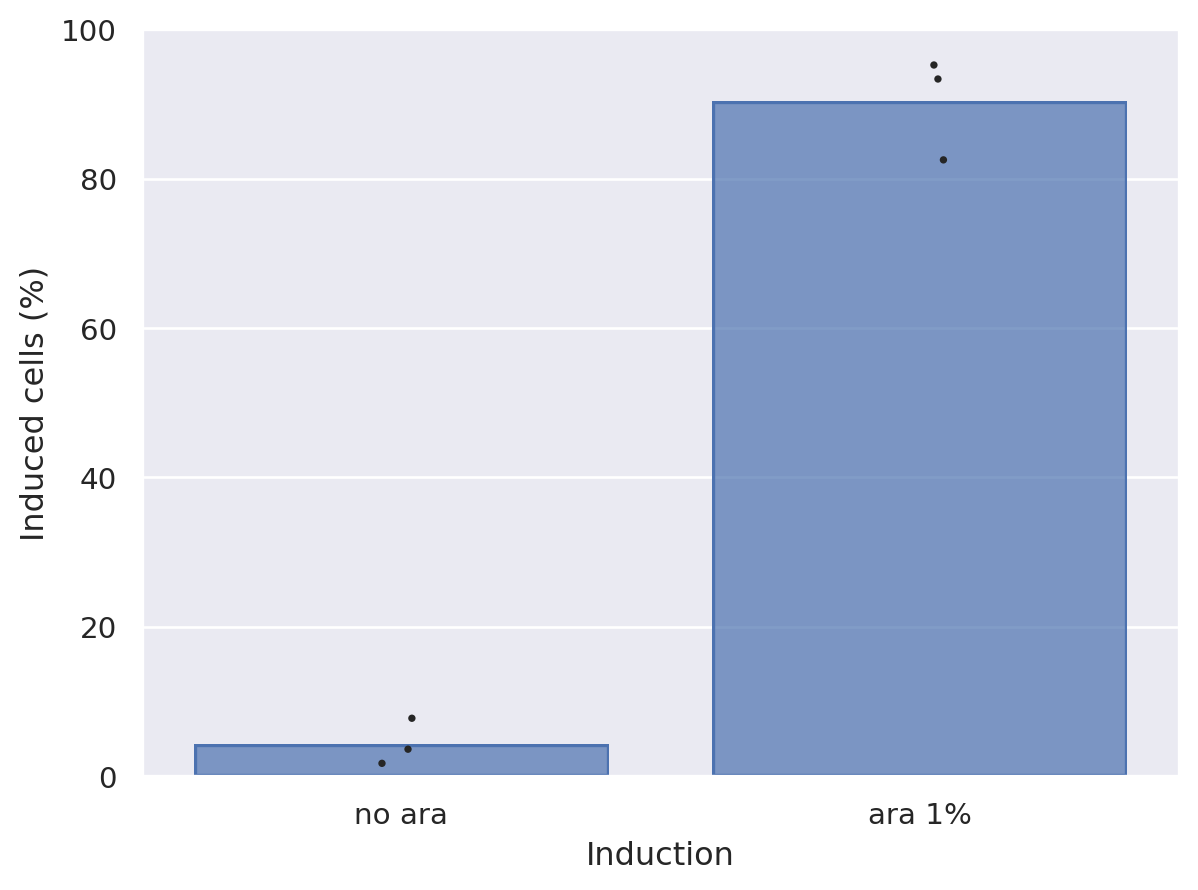

In [2]:
import seaborn.objects as so

df = (data
      .Bacteria_large
      .assign(induced=lambda df: df.SNR
                                   .gt(df
                                       .query('Group == "no ara"')
                                       .SNR
                                       .quantile(.95)
                                       )
                                   .mul(100)
              )
      .groupby(['Group', 'Dataset'])
      .agg({'induced':'mean'})
      )

(
    so.Plot(df, x='Group', y='induced')
    .add(so.Bar(), so.Agg())
    .add(so.Dots(color='k', marker='.', fillalpha=1), so.Jitter())
    .scale(x=so.Nominal(order=['no ara', 'ara 1%']))
    .limit(y=(0, 100))
    .label(x='Induction', y='Induced cells (%)')
)